In [1]:
import socket
import spynnaker8 as p
from pyNN.random import NumpyRNG, RandomDistribution
from pyNN.utility.plotting import Figure, Panel
import matplotlib.pyplot as plt
import pdb
import os
import time
import numpy as np
from numpy import genfromtxt

import sys
sys.path.insert(1, '../../miscelaneous')
from spinnorse_tools import fetch_files, plot_in_v_out

Detected PyNN version 0.9.4 and Neo version 0.6.1


In [2]:
dt = 1           # (ms) simulation timestep

cell_params = {'tau_m': 20.0,
               'tau_syn_E': 5.0,
               'tau_syn_I': 5.0,
               'v_rest': -65.0,
               'v_reset': -65.0,
               'v_thresh': -50.0,
               'tau_refrac': 0.0, # 0.1 originally
               'cm': 1,
               'i_offset': 0.0
               }

w = 1.0

2020-12-24 12:10:00 INFO: Read cfg files: /home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg, /home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg, /home/jprb/.spynnaker.cfg
2020-12-24 12:10:00 INFO: Will search these locations for binaries: /home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/common_model_binaries : /home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/model_binaries
2020-12-24 12:10:00 WARNING: /home/jprb/SpiNNorse/reports has 31 old reports that have not been closed
2020-12-24 12:10:00 WARNING: /home/jprb/SpiNNorse/application_generated_data_files has 31 old reports that have not been closed
2020-12-24 12:10:00 INFO: Setting time scale factor to 1.
2020-12-24 12:10:00 INFO: Setting machine time step to 1000 micro-seconds.
2020-12-24 12:10:00 INFO: Simulating for 200 1.0ms timesteps using a hardware timestep of 1000us
2020-12-24 12:10:00 INFO: Starting execution process


['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-24 12:10:00 INFO: Creating transceiver for 192.168.240.1
2020-12-24 12:10:00 INFO: Working out if machine is booted
2020-12-24 12:10:00 INFO: Found board with version [Version: SC&MP 3.2.5 at SpiNNaker:0:0:0 (built Thu Aug  1 10:15:06 2019)]
2020-12-24 12:10:00 INFO: Machine communication successful
2020-12-24 12:10:00 INFO: Detected a machine on IP address 192.168.240.1 which has 858 cores and 120.0 links
2020-12-24 12:10:00 INFO: Time 0:00:00.013628 taken by MachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2020-12-24 12:10:00 INFO: Time 0:00:00.021192 taken by PreAllocateResourcesForExtraMonitorSupport
2020-12-24 12:10:00 INFO: Time 0:00:00.000222 taken by NetworkSpecificationReport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2020-12-24 12:10:00 INFO: Ti

Loading Tags
|0%                          50%                         100%|
2020-12-24 12:10:11 INFO: Time 0:00:00.018801 taken by TagsLoader
Writing data
|0%                          50%                         100%|
2020-12-24 12:10:11 INFO: Time 0:00:00.023613 taken by WriteMemoryIOData
Executing data specifications and loading data for application vertices
|0%                          50%                         100%|
2020-12-24 12:10:13 INFO: Time 0:00:02.156973 taken by HostExecuteApplicationDataSpecification
Expanding Synapses
|0%                          50%                         100%|
2020-12-24 12:10:17 INFO: Time 0:00:03.754638 taken by SynapseExpander
Writing fixed route report
|0%                          50%                         100%|
2020-12-24 12:10:17 INFO: Time 0:00:00.032202 taken by FixedRouteFromMachineReport
Loading executables onto the machine
|0%                          50%                         100%|
2020-12-24 12:10:24 INFO: Time 0:00:06.761380 taken b

2020-12-24 12:10:35 INFO: Time 0:00:00.024248 taken by MallocBasedChipIDAllocator
Inserting extra monitors into graphs
|0%                          50%                         100%|
2020-12-24 12:10:35 INFO: Time 0:00:00.037192 taken by InsertExtraMonitorVerticesToGraphs
Writing the board chip report
|0%                          50%                         100%|
2020-12-24 12:10:35 INFO: Time 0:00:00.005649 taken by BoardChipReport
Filtering edges
|0%                          50%                         100%|
2020-12-24 12:10:35 INFO: Time 0:00:00.024037 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-24 12:10:35 INFO: Time 0:00:00.027577 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-24 12:10:35 INFO: Time 0:00:00.054881 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-24 12:10:35 INFO: Time 0:00:00.005552 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-24 12:10:35 INFO: Time 0:00:00.005170 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-24 12:10:35 INFO: Time 0:00:00.043568 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...



2020-12-24 12:11:11 INFO: Time 0:00:00.029374 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-24 12:11:11 INFO: Time 0:00:00.034358 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-24 12:11:11 INFO: Time 0:00:00.006065 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-24 12:11:11 INFO: Time 0:00:00.004261 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-24 12:11:11 INFO: Time 0:00:00.041532 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%         

Updating run time
|0%                          50%                         100%|
2020-12-24 12:11:33 INFO: Time 0:00:00.026690 taken by ChipRuntimeUpdater
2020-12-24 12:11:33 INFO: Time 0:00:00.000167 taken by DatabaseInterface
2020-12-24 12:11:33 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-24 12:11:33 INFO: Time 0:00:00.000928 taken by NotificationProtocol
2020-12-24 12:11:33 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-24 12:11:33 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-24 12:11:33 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed. **
2020-12-24 12:11:33 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-24 12:11:33 INFO: Application started; waiting 0.30000000000000004s f

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...



2020-12-24 12:11:44 INFO: Time 0:00:00.025038 taken by InsertExtraMonitorVerticesToGraphs
Writing the board chip report
|0%                          50%                         100%|
2020-12-24 12:11:44 INFO: Time 0:00:00.008090 taken by BoardChipReport
Filtering edges
|0%                          50%                         100%|
2020-12-24 12:11:44 INFO: Time 0:00:00.020938 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-24 12:11:44 INFO: Time 0:00:00.027356 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-24 12:11:44 INFO: Time 0:00:00.030267 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-24 12:11:44 INFO: Time 0:00:00.006636 taken by DataInMulticastRoutingGenerator
Gen

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-24 12:12:16 INFO: Time 0:00:00.035119 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-24 12:12:16 INFO: Time 0:00:00.045948 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-24 12:12:16 INFO: Time 0:00:00.009152 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-24 12:12:16 INFO: Time 0:00:00.008365 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-24 12:12:16 INFO: Time 0:00:00.044491 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

Updating run time
|0%                          50%                         100%|
2020-12-24 12:12:38 INFO: Time 0:00:00.027042 taken by ChipRuntimeUpdater
2020-12-24 12:12:38 INFO: Time 0:00:00.000162 taken by DatabaseInterface
2020-12-24 12:12:38 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-24 12:12:38 INFO: Time 0:00:00.000900 taken by NotificationProtocol
2020-12-24 12:12:38 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-24 12:12:38 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-24 12:12:38 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed. **
2020-12-24 12:12:38 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-24 12:12:38 INFO: Application started; waiting 0.30000000000000004s f

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-24 12:12:49 INFO: Time 0:00:00.032718 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-24 12:12:49 INFO: Time 0:00:00.005982 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-24 12:12:49 INFO: Time 0:00:00.005218 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-24 12:12:49 INFO: Time 0:00:00.040785 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%                         100%|

2020-12-24 12:12:49 INFO: Time 0:00:00.024077 ta

2020-12-24 12:13:11 INFO: Time 0:00:00.026771 taken by ChipRuntimeUpdater
2020-12-24 12:13:11 INFO: Time 0:00:00.000148 taken by DatabaseInterface
2020-12-24 12:13:11 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-24 12:13:11 INFO: Time 0:00:00.000464 taken by NotificationProtocol
2020-12-24 12:13:11 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-24 12:13:11 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-24 12:13:11 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed. **
2020-12-24 12:13:11 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-24 12:13:11 INFO: Application started; waiting 0.30000000000000004s for it to stop
2020-12-24 12:13:11 INFO: ** Sending pause / stop message to extern

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-24 12:13:22 INFO: Time 0:00:00.026081 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-24 12:13:22 INFO: Time 0:00:00.034376 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-24 12:13:22 INFO: Time 0:00:00.008494 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-24 12:13:22 INFO: Time 0:00:00.006017 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-24 12:13:22 INFO: Time 0:00:00.046546 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-24 12:13:58 INFO: Time 0:00:00.033750 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-24 12:13:58 INFO: Time 0:00:00.038505 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-24 12:13:58 INFO: Time 0:00:00.008106 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-24 12:13:58 INFO: Time 0:00:00.005581 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-24 12:13:58 INFO: Time 0:00:00.053424 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-24 12:14:30 INFO: Time 0:00:00.028491 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-24 12:14:30 INFO: Time 0:00:00.042004 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-24 12:14:30 INFO: Time 0:00:00.005318 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-24 12:14:30 INFO: Time 0:00:00.009261 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-24 12:14:30 INFO: Time 0:00:00.043338 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-24 12:15:03 INFO: Time 0:00:00.023533 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-24 12:15:03 INFO: Time 0:00:00.032189 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-24 12:15:03 INFO: Time 0:00:00.039604 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-24 12:15:03 INFO: Time 0:00:00.009365 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-24 12:15:03 INFO: Time 0:00:00.006368 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%            

2020-12-24 12:15:27 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-24 12:15:27 INFO: Time 0:00:00.048058 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-24 12:15:27 INFO: Time 0:00:00.027250 taken by ChipRuntimeUpdater
2020-12-24 12:15:27 INFO: Time 0:00:00.000166 taken by DatabaseInterface
2020-12-24 12:15:27 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-24 12:15:27 INFO: Time 0:00:00.001042 taken by NotificationProtocol
2020-12-24 12:15:27 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-24 12:15:27 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-24 12:15:27 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...



2020-12-24 12:15:38 INFO: Time 0:00:00.031663 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-24 12:15:38 INFO: Time 0:00:00.033231 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-24 12:15:38 INFO: Time 0:00:00.050590 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-24 12:15:38 INFO: Time 0:00:00.006397 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-24 12:15:38 INFO: Time 0:00:00.003444 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%           

2020-12-24 12:16:02 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-24 12:16:02 INFO: Time 0:00:00.046405 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-24 12:16:02 INFO: Time 0:00:00.026213 taken by ChipRuntimeUpdater
2020-12-24 12:16:02 INFO: Time 0:00:00.000189 taken by DatabaseInterface
2020-12-24 12:16:02 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-24 12:16:02 INFO: Time 0:00:00.002359 taken by NotificationProtocol
2020-12-24 12:16:02 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-24 12:16:02 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-24 12:16:02 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-24 12:16:13 INFO: Time 0:00:00.036401 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-24 12:16:13 INFO: Time 0:00:00.033495 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-24 12:16:13 INFO: Time 0:00:00.006937 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-24 12:16:13 INFO: Time 0:00:00.005506 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-24 12:16:13 INFO: Time 0:00:00.046214 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...



2020-12-24 12:16:47 INFO: Time 0:00:00.026268 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-24 12:16:48 INFO: Time 0:00:00.026326 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-24 12:16:48 INFO: Time 0:00:00.063842 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-24 12:16:48 INFO: Time 0:00:00.008244 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-24 12:16:48 INFO: Time 0:00:00.008178 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%           

2020-12-24 12:17:09 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-24 12:17:09 INFO: Time 0:00:00.050405 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-24 12:17:09 INFO: Time 0:00:00.029935 taken by ChipRuntimeUpdater
2020-12-24 12:17:09 INFO: Time 0:00:00.000188 taken by DatabaseInterface
2020-12-24 12:17:09 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-24 12:17:09 INFO: Time 0:00:00.000877 taken by NotificationProtocol
2020-12-24 12:17:09 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-24 12:17:09 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-24 12:17:09 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-24 12:17:20 INFO: Time 0:00:00.029521 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-24 12:17:20 INFO: Time 0:00:00.062656 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-24 12:17:20 INFO: Time 0:00:00.006655 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-24 12:17:20 INFO: Time 0:00:00.005771 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-24 12:17:21 INFO: Time 0:00:00.053940 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...



2020-12-24 12:17:53 INFO: Time 0:00:00.022627 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-24 12:17:53 INFO: Time 0:00:00.039864 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-24 12:17:53 INFO: Time 0:00:00.036885 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-24 12:17:53 INFO: Time 0:00:00.006687 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-24 12:17:53 INFO: Time 0:00:00.005153 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%           

2020-12-24 12:18:15 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-24 12:18:15 INFO: Time 0:00:00.046168 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-24 12:18:15 INFO: Time 0:00:00.027708 taken by ChipRuntimeUpdater
2020-12-24 12:18:15 INFO: Time 0:00:00.000174 taken by DatabaseInterface
2020-12-24 12:18:15 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-24 12:18:15 INFO: Time 0:00:00.000996 taken by NotificationProtocol
2020-12-24 12:18:15 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-24 12:18:15 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-24 12:18:15 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-24 12:18:26 INFO: Time 0:00:00.046846 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-24 12:18:26 INFO: Time 0:00:00.041395 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-24 12:18:26 INFO: Time 0:00:00.007551 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-24 12:18:26 INFO: Time 0:00:00.006807 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-24 12:18:26 INFO: Time 0:00:00.045954 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

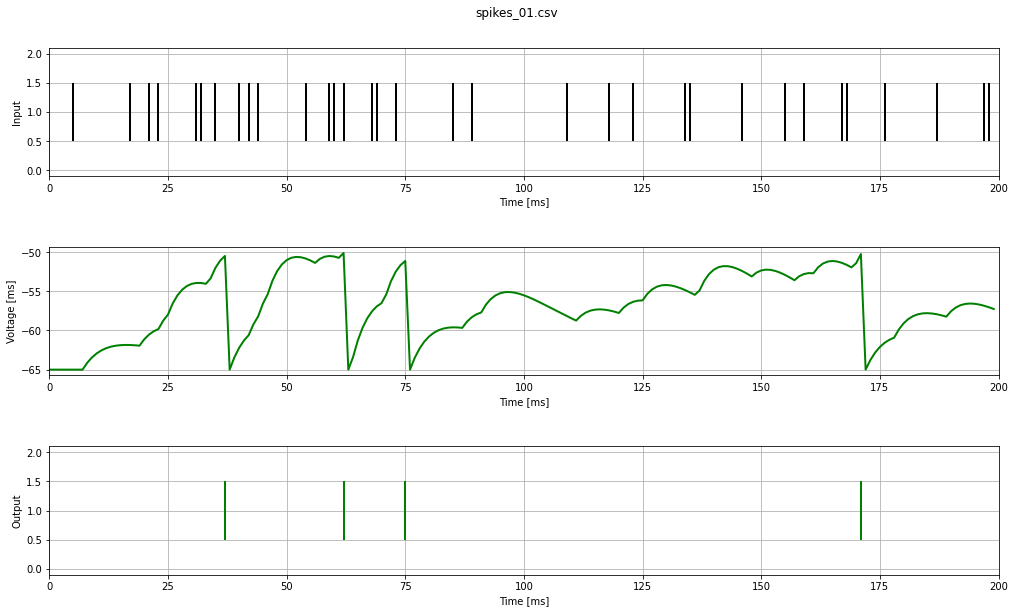

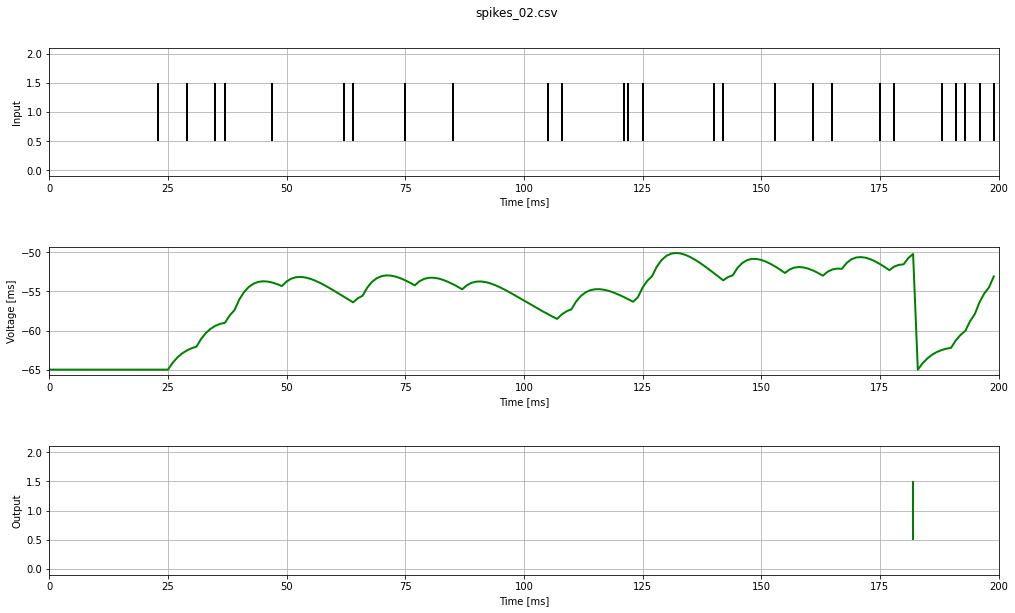

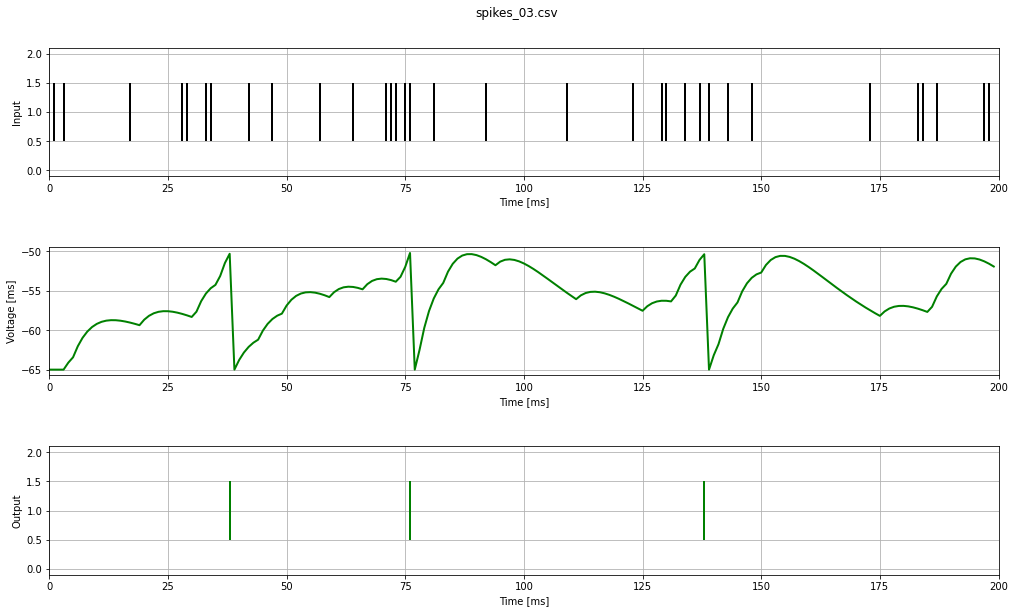

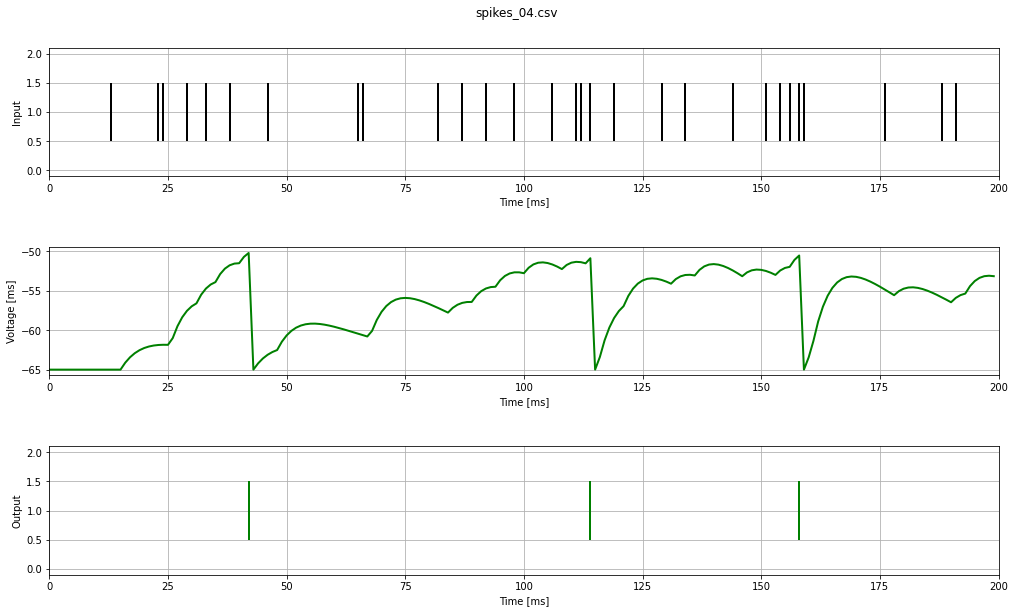

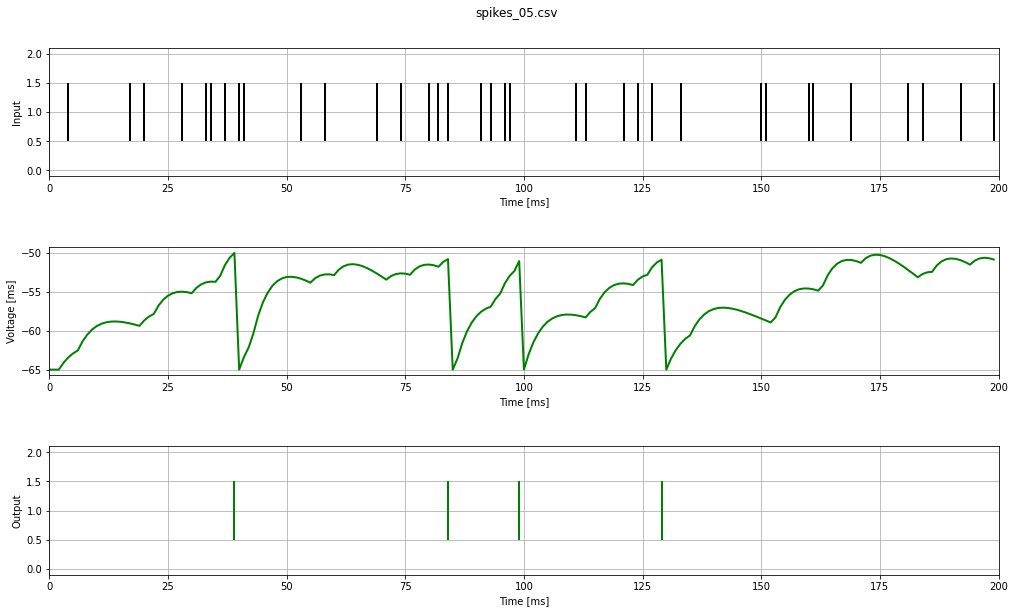

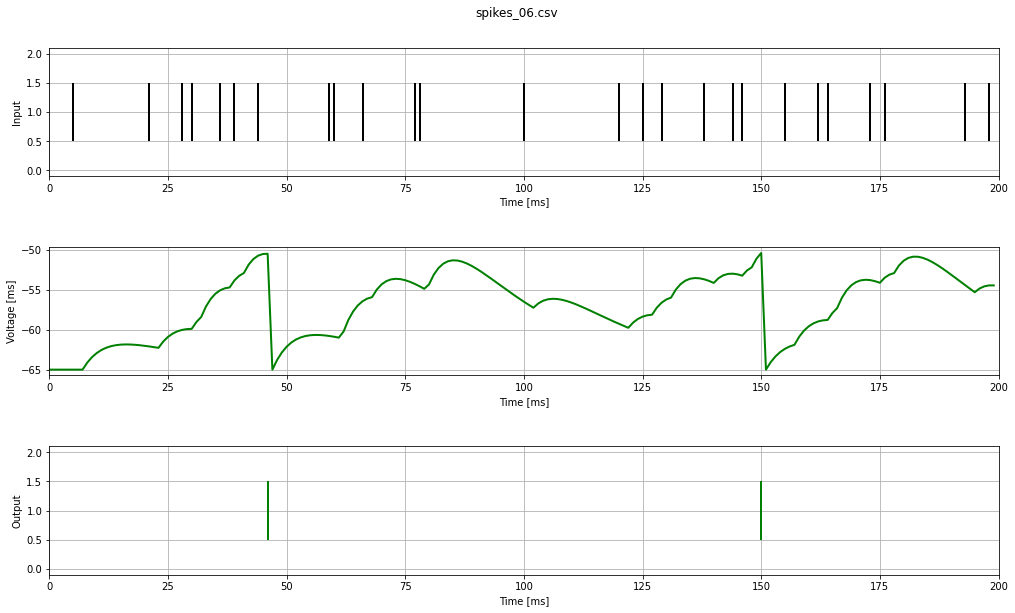

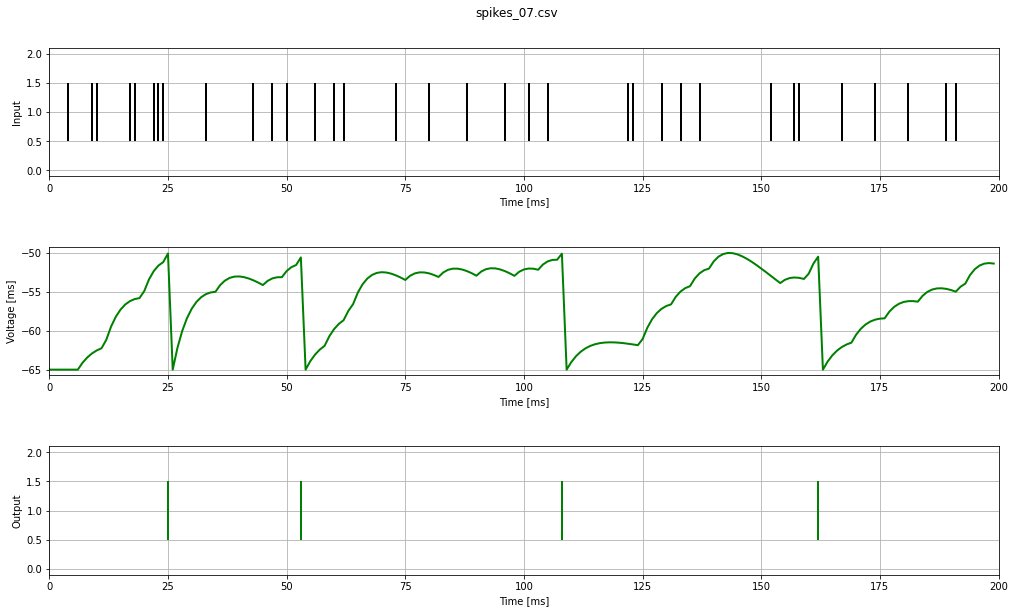

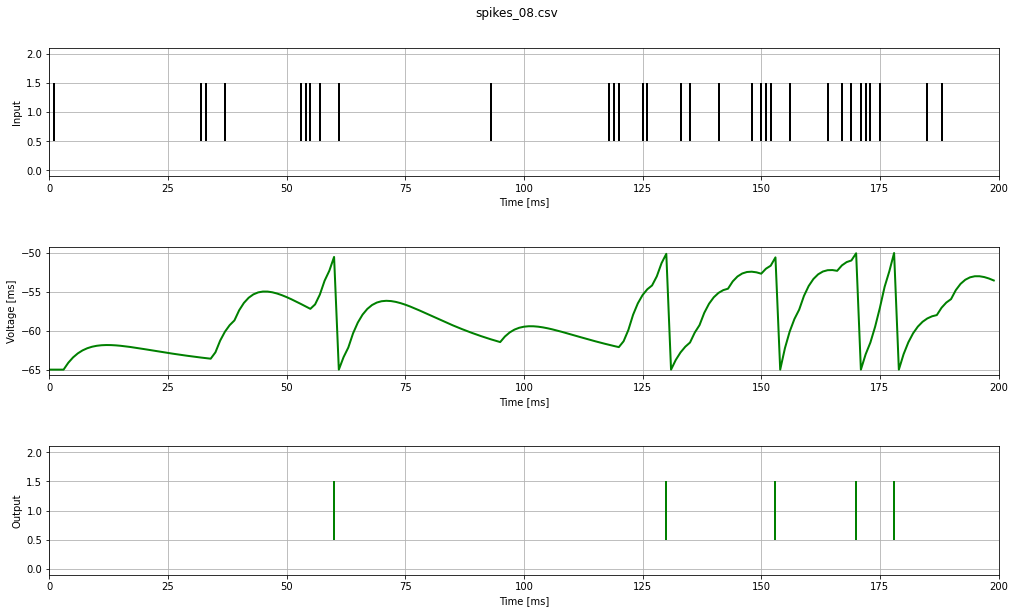

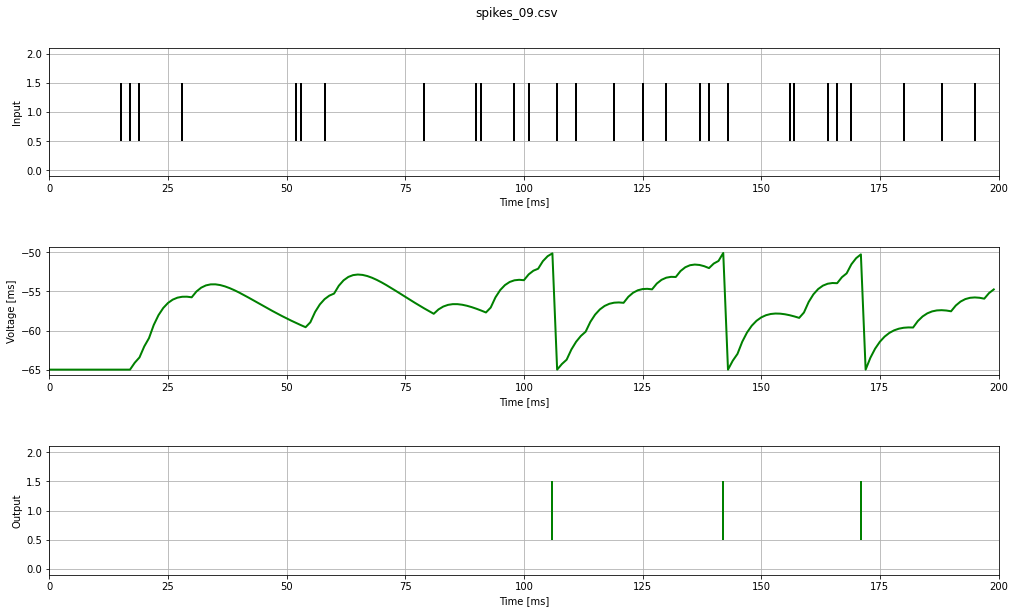

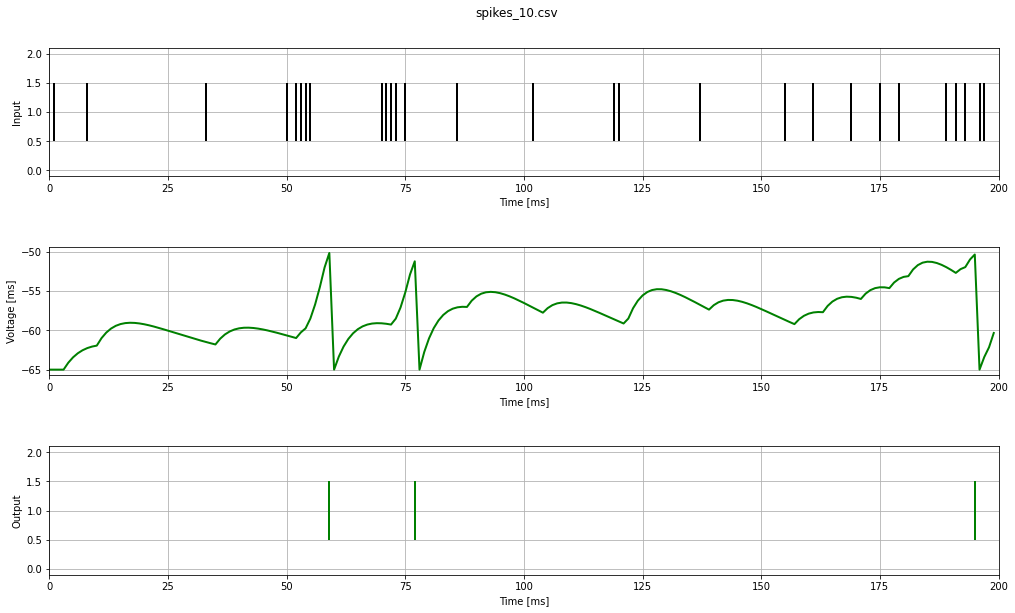

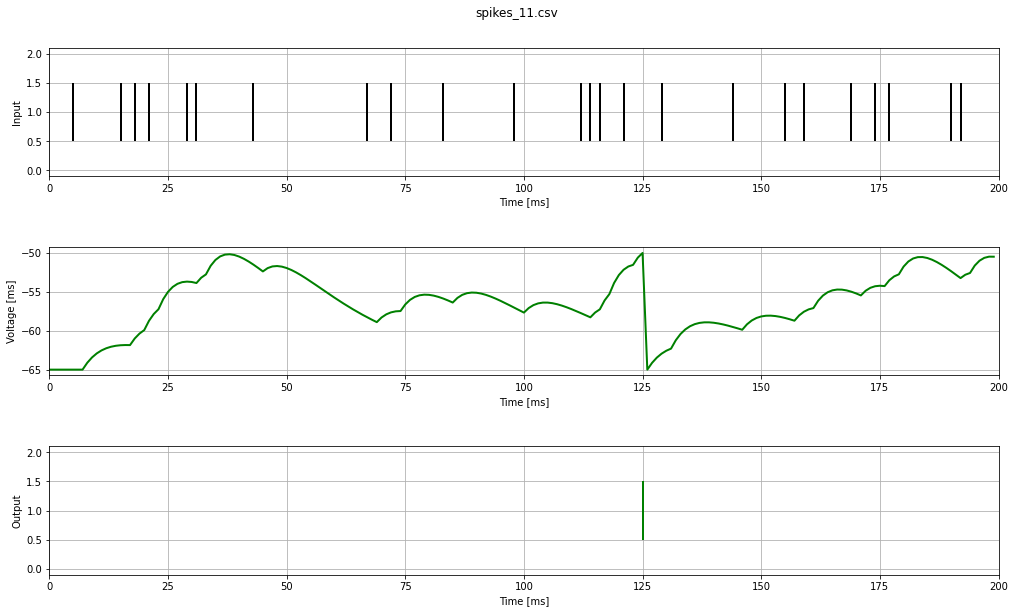

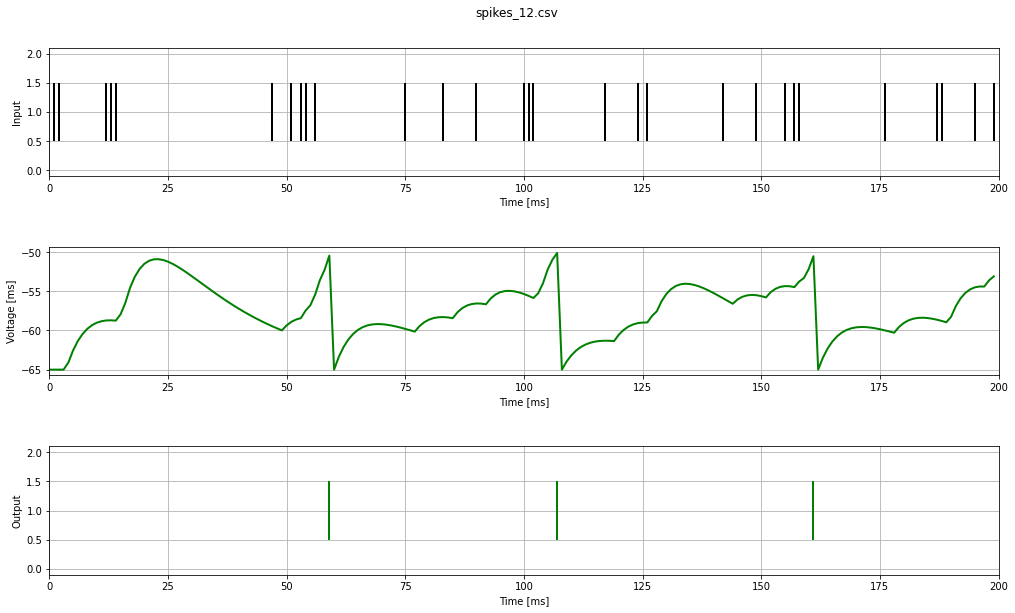

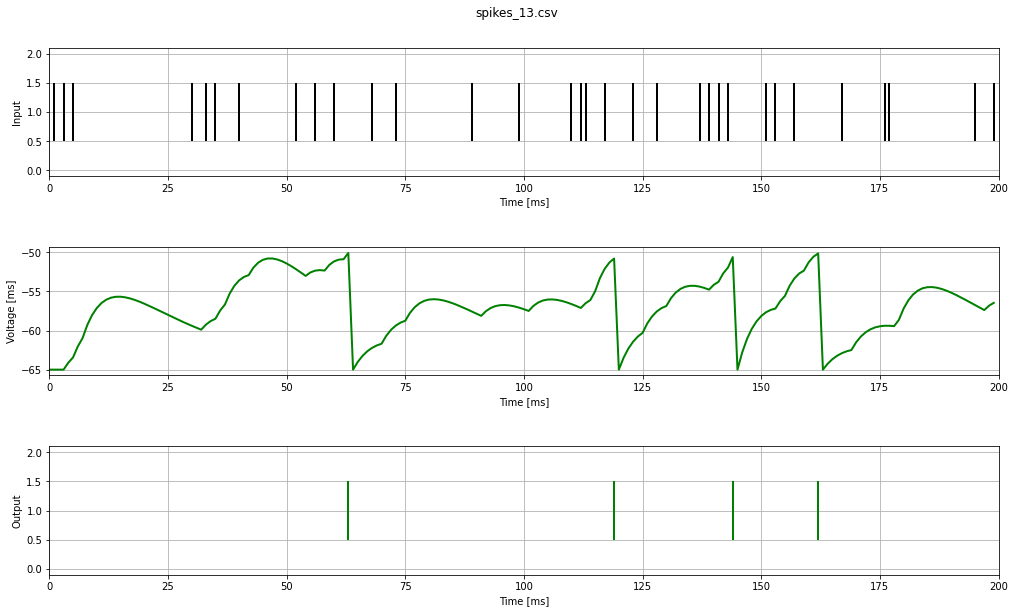

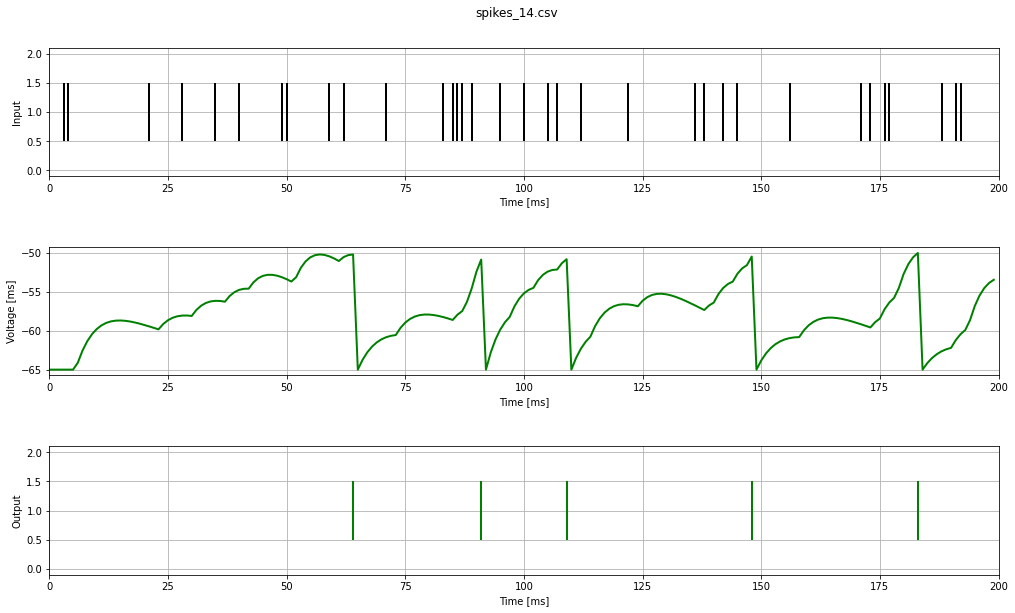

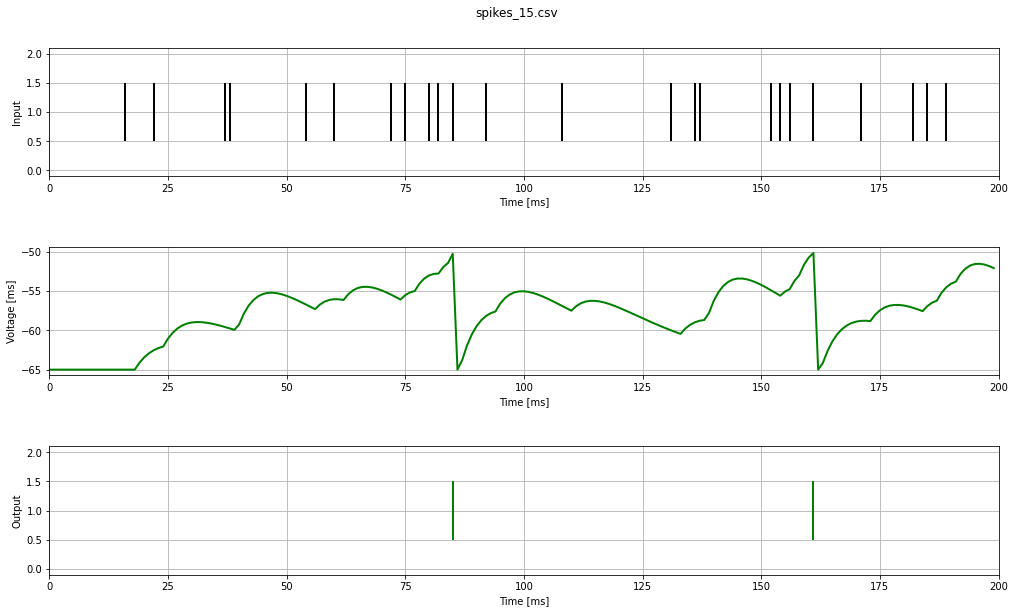

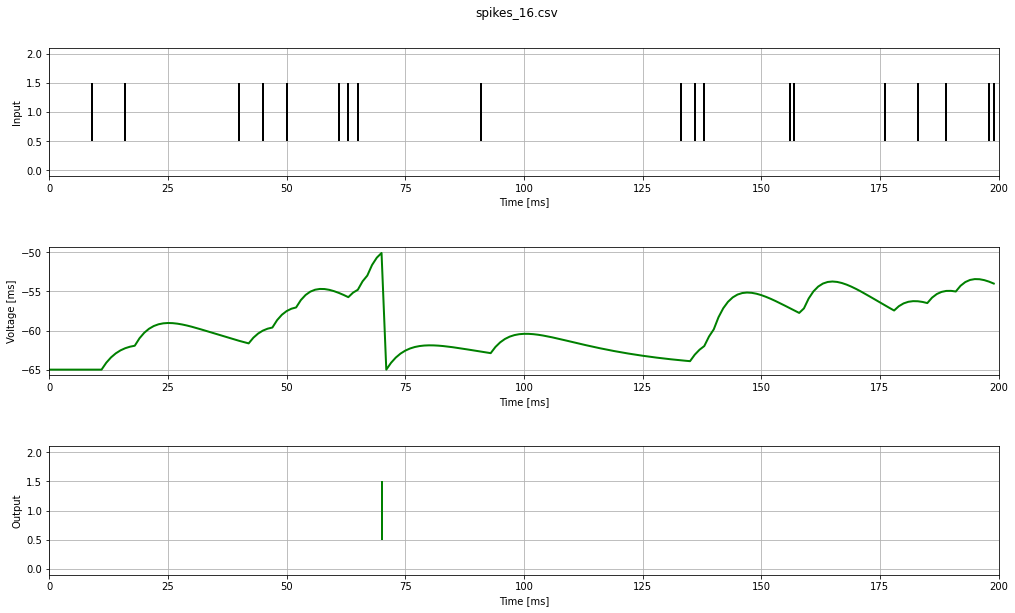

In [3]:
'''
Fetch available trains of spikes in path
'''
path = "summary/common/"
files = fetch_files(path) 


'''
Simulate for each input file + Plot + Save data
'''
n = len(files)
for i in range(n):
        
    #SpiNNaker Setup
    delay = 2*dt
    node_id = p.setup(timestep=dt, min_delay=delay, max_delay=delay)     
    p.set_number_of_neurons_per_core(p.IF_curr_exp, 100) #  100 neurons per core
    
    # Get Input Spikes from file
    f_name = files[i]
    sfn = f_name.replace(path, "")

    i_spikes = genfromtxt(files[i], delimiter=',')
    i_indexes = np.where(i_spikes>0)
    nb_steps = len(i_spikes)

    # Populations
    print("Creating cell populations in node %s ..." % node_id)
    celltype = p.IF_curr_exp
    cells_l1 = p.Population(1, celltype(**cell_params), label="Layer_1")

    spike_train_1 = p.SpikeSourceArray(spike_times=(i_indexes))
    cells_l0 = p.Population(1,spike_train_1)

    # Connectivity
    print("Connecting populations  in node %s ..." % node_id)
    cell_conn = p.AllToAllConnector()
    connections = { 'i1l1': p.Projection(cells_l0, cells_l1, cell_conn,
                            receptor_type='excitatory',
                            synapse_type=p.StaticSynapse(weight=w, delay=delay))}

    # === Setup recording ===
    print("Setting up recording in node %s ..." % node_id)
    cells_l1.record(["v","spikes"])
    cells_l0.record(["spikes"])

    # === Run simulation ===
    print("%d Running simulation..." % node_id)
    p.run(nb_steps)

    # === Print results to file ===

    l1_voltage = cells_l1.get_data("v")
    l1_spikes = cells_l1.get_data("spikes")
    in_spikes = cells_l0.get_data("spikes")

    # === Finished with simulator ===

    p.end()
    time.sleep(10)
    v_array = np.array(l1_voltage.segments[0].filter(name="v")[0]).reshape(-1)

    i_indexes = np.asarray(in_spikes.segments[0].spiketrains[0])
    o_indexes = np.asarray(l1_spikes.segments[0].spiketrains[0])

    o_spikes = np.zeros(nb_steps)
    for i in o_indexes.astype(int):
        o_spikes[i] = 1

    np.savetxt("summary/spinnaker/" + "voltage_" + sfn, v_array, delimiter=",")
    np.savetxt("summary/spinnaker/" + "output_" + sfn, o_spikes, delimiter=",")

    xlim = len(i_spikes)
    plot_in_v_out(i_indexes, v_array, o_indexes, sfn, xlim)